# Clustering de documents

## Imports

In [70]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [71]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/pav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pav/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
data_path = "../../data/txt/"

## Clustering documents

In [73]:
# Choix de la décénnie
DECADE = '1930'

In [74]:
# Charger tous les fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [75]:
# Exemple de fichiers
files[:5]

['KB_JB838_1930-01-05_01-00006.txt',
 'KB_JB838_1930-01-09_01-00001.txt',
 'KB_JB838_1930-01-09_01-00014.txt',
 'KB_JB838_1930-01-16_01-00010.txt',
 'KB_JB838_1930-01-20_01-00002.txt']

In [76]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [77]:
# Exemple de textes
texts[0][:400]

"15 G I C 3. L ^ SQ| R V .1- . FINANCE - INDUSTRIE - COMMERCE BOURSE de BRUXELLES I Marchés d’Anvers REVUE HEBDOMADAIRE La Eourse, qui avait très peu de chance de g.tg:v»r en aciivi.é penciant cette semaine raccourcie par le congé du Nouvel- Aii, a c i cependant une attitude qui permet de bien augurer des prochaines séances. L's capitalistes semblent enfin s’être rendu compte cours leur fou: quelqu"

### Vectoriser les documents à l'aide de TF-IDF

In [78]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [79]:
# Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [80]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

/home/pav/Documents/ULB 2025-2026 TAC TP/tac/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [81]:
# Détail de la matrice
tfidf_vectors

<1000x3942 sparse matrix of type '<class 'numpy.float64'>'
	with 789606 stored elements in Compressed Sparse Row format>

In [82]:
# Imprimer le vecteur tf-IDF du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

id          0.455144
janvier     0.243864
disp        0.217844
no          0.189761
ld          0.180348
              ...   
entendre    0.000000
entendu     0.000000
entente     0.000000
entière     0.000000
♦           0.000000
Length: 3942, dtype: float64

### Tests: comparaison des vecteurs de 2 docs et calcul de leur distance

In [83]:
tfidf_array = tfidf_vectors.toarray()

In [84]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
# Vecteur du document 1
tfidf_array[1]

array([0.05956271, 0.        , 0.        , ..., 0.        , 0.        ,
       0.02573525])

In [86]:
cosine(tfidf_array[0], tfidf_array[1])

0.8606658574668415

### Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

In [ ]:
# Définir un nombre initial de clusters
N_CLUSTERS = 6
# Testé avec 3,4,5,6

In [88]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [89]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`
clusters = km_model.fit_predict(tfidf_vectors)

In [90]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [91]:
pprint(dict(clustering))

{0: ['KB_JB838_1930-03-21_01-00004.txt',
     'KB_JB838_1930-04-03_01-00004.txt',
     'KB_JB838_1930-06-16_01-00004.txt',
     'KB_JB838_1930-06-24_01-00004.txt',
     'KB_JB838_1930-08-05_01-00004.txt',
     'KB_JB838_1930-08-19_01-00003.txt',
     'KB_JB838_1930-09-15_01-00004.txt',
     'KB_JB838_1930-09-28_01-00004.txt',
     'KB_JB838_1930-11-04_01-00004.txt',
     'KB_JB838_1931-03-27_01-00005.txt',
     'KB_JB838_1931-09-02_01-00004.txt',
     'KB_JB838_1931-11-10_01-00004.txt',
     'KB_JB838_1932-02-03_01-00004.txt',
     'KB_JB838_1932-04-17_01-00004.txt',
     'KB_JB838_1932-04-23_01-00004.txt',
     'KB_JB838_1932-07-08_01-00005.txt',
     'KB_JB838_1932-09-27_01-00004.txt',
     'KB_JB838_1932-12-07_01-00004.txt',
     'KB_JB838_1933-01-01_01-00005.txt',
     'KB_JB838_1933-01-05_01-00004.txt',
     'KB_JB838_1933-02-24_01-00005.txt',
     'KB_JB838_1933-03-11_01-00005.txt',
     'KB_JB838_1933-05-14_01-00005.txt',
     'KB_JB838_1933-05-26_01-00006.txt',
     'KB_JB838_1

### Visualiser les clusters

In [92]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
# Cette étape est nécessaire afin de visualiser les documents dans un espace 2D
# https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [93]:
reduced_vectors[:10]

array([[-0.20617369,  0.00851726],
       [-0.24991349,  0.06358552],
       [ 0.01281754, -0.18086667],
       [ 0.50604625,  0.39697198],
       [-0.32169693,  0.10166627],
       [ 0.20311397, -0.49186667],
       [-0.1247206 , -0.04589014],
       [-0.26433298,  0.02043341],
       [ 0.08005685, -0.08560318],
       [ 0.25099757, -0.07204345]])

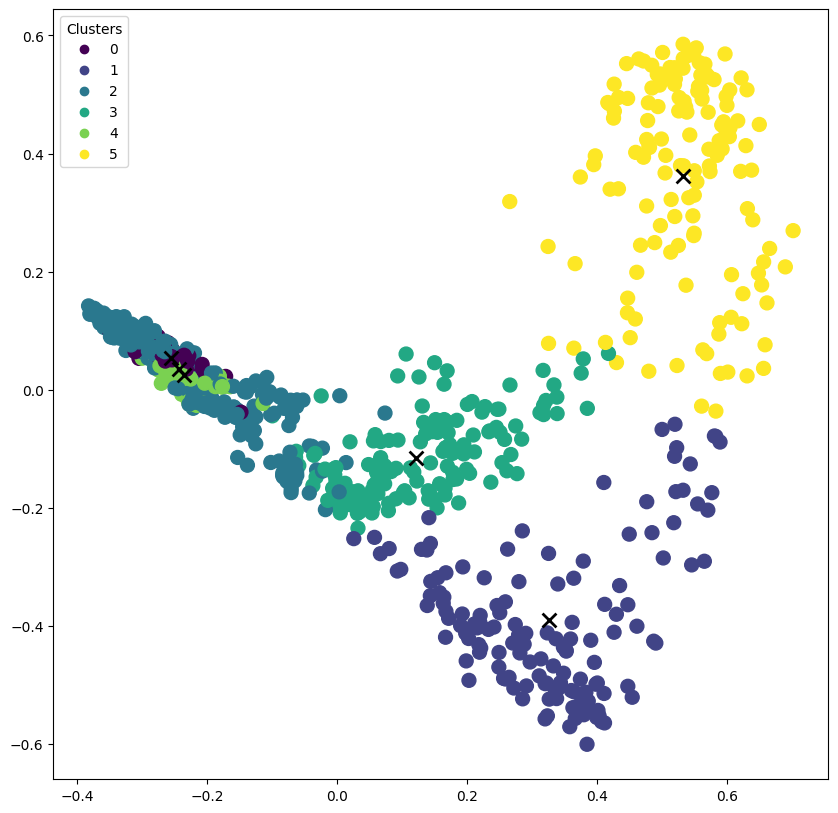

In [94]:
# Générer le plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")